In [1]:
import numpy as np




In [2]:
np.set_printoptions(precision=3, suppress=True)


In [3]:
X = np.array([[0, 1], [1, 0]])
print(X)

[[0 1]
 [1 0]]


In [4]:
IX = np.kron(np.eye(2), X)                             
print(IX)


[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


In [5]:
XI = np.kron(X, np.eye(2))
print(XI)

[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


In [6]:
P = - (IX + XI)
print(P)

[[-0. -1. -1. -0.]
 [-1. -0. -0. -1.]
 [-1. -0. -0. -1.]
 [-0. -1. -1. -0.]]


In [7]:
λ, v = np.linalg.eigh(P)
print("Eigenvalues:", λ)
print("Eigenstate for lowest eigenvalue", v[:, 0])

Eigenvalues: [-2. -0.  0.  2.]
Eigenstate for lowest eigenvalue [-0.5 -0.5 -0.5 -0.5]


DWAVE Annealers

In [12]:
import dimod


In [13]:
linear={('x'):3, ('y'):2, ('z'):-5}
print(linear)


{'x': 3, 'y': 2, 'z': -5}


In [14]:
quadratic={('x','y'):1, ('x','z'):-3.5, ('y','z'):4}
print(quadratic)

{('x', 'y'): 1, ('x', 'z'): -3.5, ('y', 'z'): 4}


In [15]:
vartype = dimod.BINARY
bqm = dimod.BinaryQuadraticModel(linear, quadratic,vartype)

In [16]:
sampler = dimod.ExactSolver()
response = sampler.sample(bqm)
print(response)

   x  y  z energy num_oc.
6  1  0  1   -5.5       1
7  0  0  1   -5.0       1
0  0  0  0    0.0       1
4  0  1  1    1.0       1
5  1  1  1    1.5       1
3  0  1  0    2.0       1
1  1  0  0    3.0       1
2  1  1  0    6.0       1
['BINARY', 8 rows, 8 samples, 3 variables]


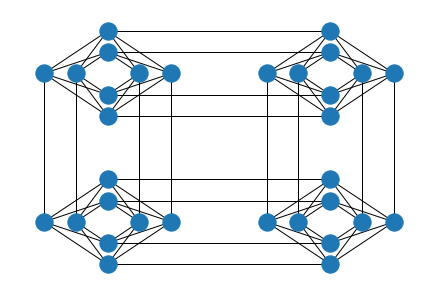

In [1]:
import matplotlib.pyplot as plt
import dwave_networkx as dnx
%matplotlib inline
connectivity_structure = dnx.chimera_graph(2, 2)
dnx.draw_chimera(connectivity_structure)
plt.show()

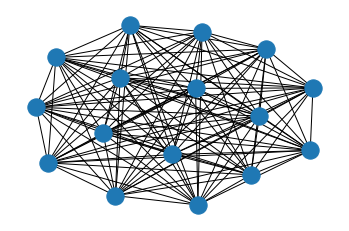

In [3]:
import networkx as nx
G = nx.complete_graph(16)
plt.axis('off')
nx.draw_networkx(G, with_labels=False)


In [9]:
import dimod
J = {(0, 1): 1.0, (1, 2): -1.0}
h = {0:0, 1:0, 2:0}
model = dimod.BinaryQuadraticModel(h, J, 0.0, dimod.SPIN)
sampler = dimod.SimulatedAnnealingSampler()
response = sampler.sample(model, num_reads=10)
print("Energy of samples:")
print([solution.energy for solution in response.data()])

Energy of samples:
[-2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0]


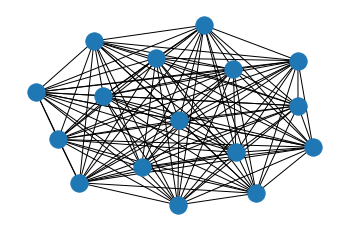

In [11]:
import networkx as nx
G = nx.complete_graph(16)
plt.axis('off')
nx.draw_networkx(G, with_labels=False)

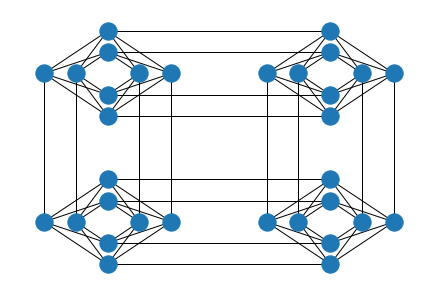

In [2]:
import matplotlib.pyplot as plt
import dwave_networkx as dnx
%matplotlib inline
connectivity_structure = dnx.chimera_graph(2, 2)
dnx.draw_chimera(connectivity_structure)
plt.show()


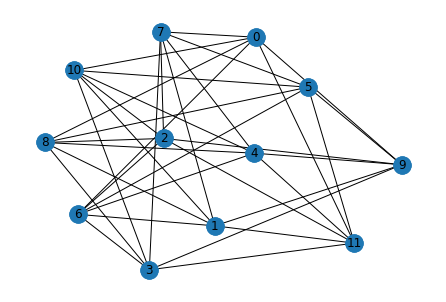

In [2]:
sampler = SimulatedAnnealingSampler()
G = nx.Graph()
G.add_edges_from([(0,6),(0,7),(0,8),(0,9),(0,10),(0,11),
(1,6),(1,7),(1,8),(1,9),(1,10),(1,11),
(2,6),(2,7),(2,8),(2,9),(2,10),(2,11),
(3,6),(3,7),(3,8),(3,9),(3,10),(3,11),
(4,6),(4,7),(4,8),(4,9),(4,10),(4,11),
(5,6),(5,7),(5,8),(5,9),(5,10),(5,11)])
pos = nx.spring_layout(G)
nx.draw(G,pos,with_labels=True)
nx.draw_networkx_nodes(G,pos)
plt.show()

In [3]:
candidate = dnx.maximum_cut(G, sampler)
print (candidate, " is the maxcut")
S = dnx.maximum_cut(G, ExactSolver())
print (S, " is the maxcut")

{6, 7, 8, 9, 10, 11}  is the maxcut
{0, 1, 2, 3, 4, 5}  is the maxcut


In [5]:
import random

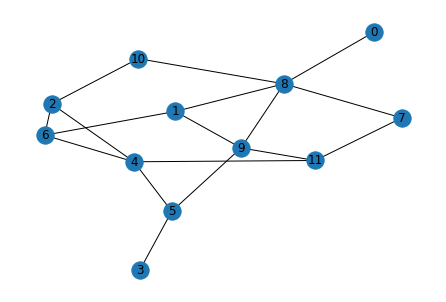

{0, 1, 3, 4, 7, 9, 10}  is the maxcut
{1, 2, 5, 8, 11}  is the maxcut


In [6]:
seed = random.randrange(1, 1000)
G1 = nx.erdos_renyi_graph(n=12, p=0.3, seed=seed)
pos = nx.spring_layout(G1)
nx.draw(G1,pos,with_labels=True)
plt.show()
sampler = SimulatedAnnealingSampler()
candidate = dnx.maximum_cut(G1, sampler)
print (candidate, " is the maxcut")
S = dnx.maximum_cut(G1, ExactSolver())
print (S, " is the maxcut")

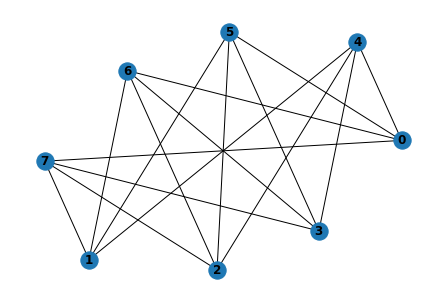

In [15]:
# Import the necessary libraries
import dwave_networkx as dnx
import matplotlib.pyplot as plt

# Create the toy Chimera graph
G = dnx.chimera_graph(1, 1)

# Set the weights of the edges in the Chimera graph
for u, v, d in G.edges(data=True):
    d['weight'] = 1.0

# Plot the Chimera graph
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold')

# Show the plot
plt.show()


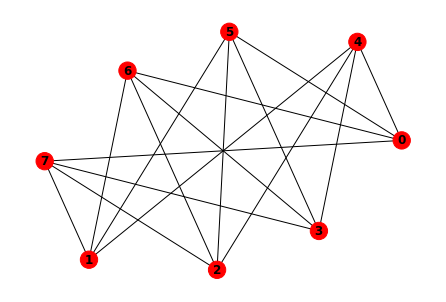

In [16]:
# Import the necessary libraries
import dwave_networkx as dnx
import matplotlib.pyplot as plt

# Create the toy Chimera graph
G = dnx.chimera_graph(1, 1)

# Set the colors of the nodes in the Chimera graph
color_map = []
for node in G.nodes():
    if node < 8:
        color_map.append('r')
    else:
        color_map.append('b')

# Set the weights of the edges in the Chimera graph
for u, v, d in G.edges(data=True):
    d['weight'] = 1.0

# Plot the Chimera graph
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, node_color=color_map, with_labels=True, font_weight='bold')

# Show the plot
plt.show()


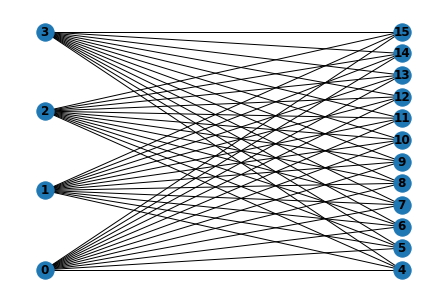

In [17]:
# Import the necessary libraries
import networkx as nx
import matplotlib.pyplot as plt

# Create a complete K-N graph on 16 nodes
G = nx.complete_bipartite_graph(4, 12)

# Set the weights of the edges in the K-N graph
for u, v, d in G.edges(data=True):
    d['weight'] = 1.0

# Plot the K-N graph
pos = nx.bipartite_layout(G, {0, 1, 2, 3})
nx.draw(G, pos, with_labels=True, font_weight='bold')

# Show the plot
plt.show()


In [21]:
# Import the necessary libraries
import dwave_networkx as dnx
import minorminer

# Create a graph
G = nx.complete_graph(5)

# Create a Chimera graph
C = dnx.chimera_graph(1, 1)

# Find a minor-embedding of the graph on the Chimera graph
G_embedded, _ = minorminer.find_embedding(G, C)

# Print the nodes and edges of the embedded graph
print(G_embedded.nodes())
print(G_embedded.edges())


ValueError: too many values to unpack (expected 2)

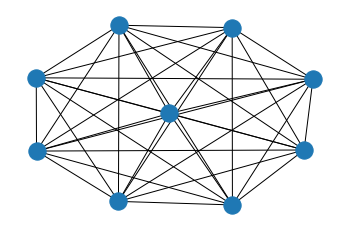

In [35]:
import networkx as nx
G = nx.complete_graph(9)
plt.axis('off')
nx.draw_networkx(G, with_labels=False)

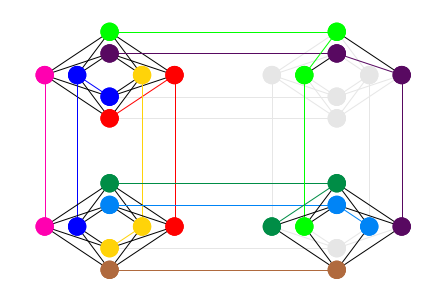

In [36]:
import minorminer
embedded_graph = minorminer.find_embedding(G.edges(),
connectivity_structure.edges())
dnx.draw_chimera_embedding(connectivity_structure, embedded_graph)
plt.show()

AttributeError: 'tuple' object has no attribute 'legend'

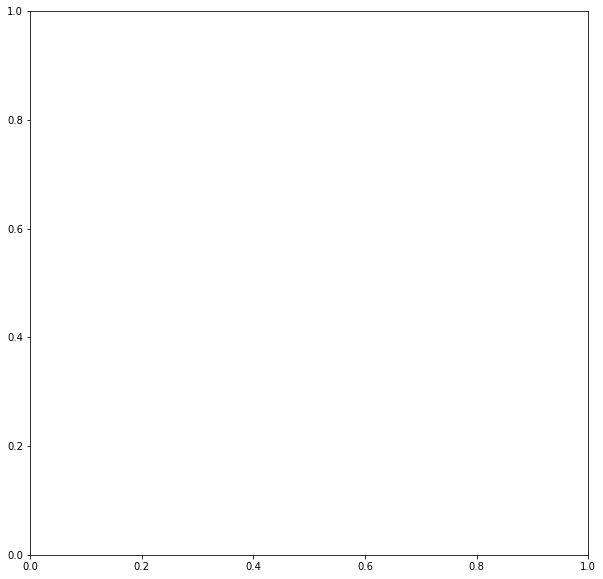

In [39]:
#fig, 
ax = plt.subplots(figsize=(10, 10))
ax.legend(["Qubits", "Couplers"], loc="upper right")
# add a legend to the plot


# show or save the plot
plt.show()